<a href="https://colab.research.google.com/github/devadharshini2005/pneumonia-prediction-using-deep-learning/blob/main/resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Define directories for train and validation data
train_dir = '/content/drive/MyDrive/archive (2)/chest_xray/train'
validation_dir = '/content/drive/MyDrive/archive (2)/chest_xray/test'

# Define ImageDataGenerators for train and validation data
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to not shuffle for evaluation
)

# Load pre-trained ResNet50 model without top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build model on top of ResNet50
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Adjust based on your number of classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=25
)



Found 3404 images belonging to 2 classes.
Found 176 images belonging to 2 classes.
94765736/94765736 [==============================] - 4s 0us/step
Epoch 1/25
106/106 [==============================] - 1082s 10s/step - loss: 1.0468 - accuracy: 0.5910 - val_loss: 0.6748 - val_accuracy: 0.5125
Epoch 2/25
106/106 [==============================] - 438s 4s/step - loss: 0.5885 - accuracy: 0.6406 - val_loss: 0.6015 - val_accuracy: 0.6125
Epoch 3/25
106/106 [==============================] - 447s 4s/step - loss: 0.5208 - accuracy: 0.7224 - val_loss: 0.5561 - val_accuracy: 0.6313
Epoch 4/25
106/106 [==============================] - 452s 4s/step - loss: 0.5184 - accuracy: 0.7123 - val_loss: 0.5658 - val_accuracy: 0.6500
Epoch 5/25
106/106 [==============================] - 447s 4s/step - loss: 0.4808 - accuracy: 0.7556 - val_loss: 0.5255 - val_accuracy: 0.7125
Epoch 6/25
106/106 [==============================] - 452s 4s/step - loss: 0.4720 - accuracy: 0.7619 - val_loss: 0.4680 - val_accuracy:

In [ ]:
model.save('/path/to/save/your/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 31s 5s/step - loss: 0.7045 - accuracy: 0.6812
Validation Loss: 0.7045
Validation Accuracy: 0.6812
6/6 [==============================] - 25s 4s/step
              precision    recall  f1-score   support

      NORMAL       1.00      0.35      0.51        78
   PNEUMONIA       0.66      1.00      0.79        98

    accuracy                           0.71       176
   macro avg       0.83      0.67      0.65       176
weighted avg       0.81      0.71      0.67       176



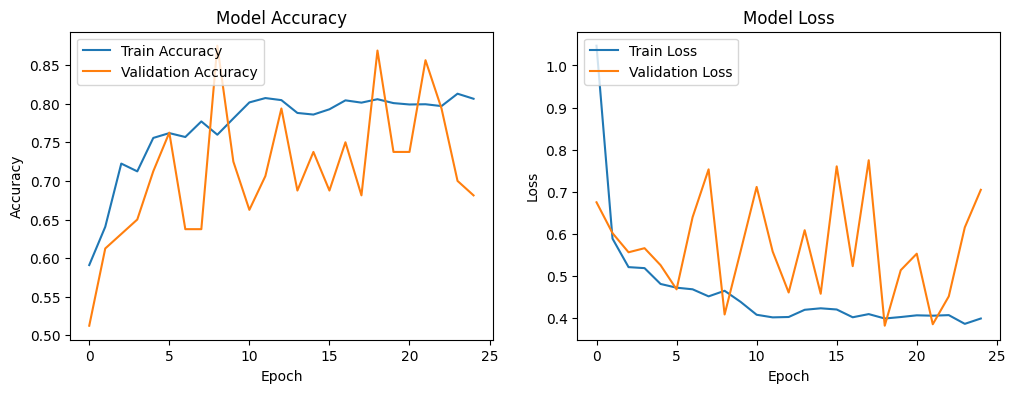

Final Training Accuracy: 0.8063
Final Validation Accuracy: 0.6812


In [ ]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Ensure the validation generator is reset
validation_generator.reset()

# Make predictions
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = validation_generator.classes

# Class labels
class_labels = list(validation_generator.class_indices.keys())

# Generate classification report
report = classification_report(true_classes, predicted_classes[:len(true_classes)], target_names=class_labels)
print(report)

# Plotting training & validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

# Extract final training and validation accuracy
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

# Print the final accuracies
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model('/path/to/save/your/model.h5')  # Replace with the actual path to your model

# Define the class labels manually if you know them
class_labels = ['NORMAL', 'PNEUMONIA']  # Adjust according to your classes

def load_and_preprocess_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(150, 150))
    # Convert the image to an array
    img_array = image.img_to_array(img)
    # Expand dimensions to match the input shape of the model
    img_array = np.expand_dims(img_array, axis=0)
    # Rescale the image
    img_array = img_array / 255.0
    return img_array

def predict_pneumonia(model, img_path):
    # Preprocess the image
    img_array = load_and_preprocess_image(img_path)
    # Predict the class
    prediction = model.predict(img_array)
    # Get the predicted class index
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    # Map the index to class label
    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label

# Example usage
img_path = '/content/drive/MyDrive/0a1f5edc85aa58d5780928cb39b08659c1fc4d6d7c7dce2f8db1d63c7c737234_big_gallery.jpeg'  # Replace with the path to your image
predicted_label = predict_pneumonia(model, img_path)
print(f"The predicted label for the image is: {predicted_label}")


1/1 [==============================] - 1s 1s/step
The predicted label for the image is: PNEUMONIA
